In [32]:
# load data
import pandas as pd
envi_df = pd.read_csv('environmental factors.csv')
envi_df.head()

,temperature,humidity,wind_speed,carbon_emissions,solar_irradiance,pollution_level
0,22.490802,52.418449,19.599966,337.165056,369.020837,84.723658
1,34.014286,49.974726,8.690240,256.681604,185.335998,49.451704
2,29.639879,40.569235,11.932794,484.024336,213.723302,19.546561
3,26.973170,66.436000,18.265613,148.540303,262.604015,73.664179
4,18.120373,58.597450,14.641787,314.535387,283.288001,41.867814


In [33]:
# find missing values
envi_df.isnull().sum()

temperature         0
humidity            0
wind_speed          0
carbon_emissions    0
solar_irradiance    0
pollution_level     0
dtype: int64

In [34]:
#scale the data, features are temperature,humidity,wind_speed,carbon_emissions,solar_irradiance,pollution_level
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = envi_df[['temperature', 'humidity', 'wind_speed', 'carbon_emissions', 'solar_irradiance', 'pollution_level']]
X_test_scaled = scaler.fit_transform(X)

In [35]:
#kmeans
from sklearn.cluster import KMeans
mall_cluster_kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
envi_df["cluster"] = mall_cluster_kmeans.fit_predict(X_test_scaled)
envi_df.head()

,temperature,humidity,wind_speed,carbon_emissions,solar_irradiance,pollution_level,cluster
0,22.490802,52.418449,19.599966,337.165056,369.020837,84.723658,2
1,34.014286,49.974726,8.690240,256.681604,185.335998,49.451704,1
2,29.639879,40.569235,11.932794,484.024336,213.723302,19.546561,0
3,26.973170,66.436000,18.265613,148.540303,262.604015,73.664179,1
4,18.120373,58.597450,14.641787,314.535387,283.288001,41.867814,2


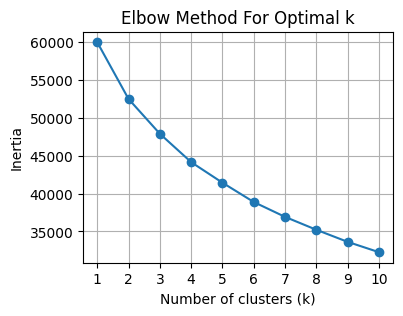

In [36]:
# choosing the optimal number of clusters using elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_test_scaled)
    inertia.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.figure(figsize=(4, 3))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

In [40]:
# kmeans with optimal k for
# Index(['temperature', 'humidity', 'wind_speed', 'carbon_emissions',
#        'solar_irradiance', 'pollution_level', 'cluster'],
#       dtype='object')
from sklearn.cluster import KMeans
optimal_k = 2
mall_cluster_kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
envi_df["cluster"] = mall_cluster_kmeans.fit_predict(X_test_scaled)
envi_df.head() 


,temperature,humidity,wind_speed,carbon_emissions,solar_irradiance,pollution_level,cluster
0,22.490802,52.418449,19.599966,337.165056,369.020837,84.723658,1
1,34.014286,49.974726,8.690240,256.681604,185.335998,49.451704,0
2,29.639879,40.569235,11.932794,484.024336,213.723302,19.546561,0
3,26.973170,66.436000,18.265613,148.540303,262.604015,73.664179,1
4,18.120373,58.597450,14.641787,314.535387,283.288001,41.867814,0


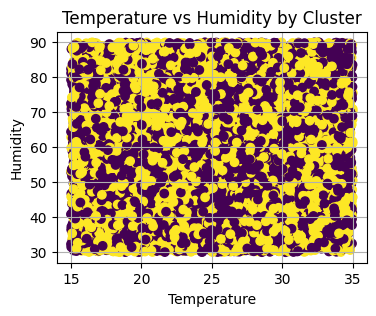

In [45]:
# Index(['temperature', 'humidity', 'wind_speed', 'carbon_emissions',
#        'solar_irradiance', 'pollution_level', 'cluster'],
#       dtype='object')
# plot scatterplot of temperature vs humidity colored by cluster
plt.figure(figsize=(4, 3))
plt.scatter(envi_df['temperature'], envi_df['humidity'], c=envi_df['cluster'], cmap='viridis')
plt.title('Temperature vs Humidity by Cluster')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.grid()
plt.show()

In [42]:
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X_test_scaled, envi_df['cluster'])
print("Silhouette Score:", sil_score)

Silhouette Score: 0.12329174489534976
